In [1]:
%matplotlib widget
from collections import deque
import time

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
x_min, x_max = -2.5, 1.0
y_min, y_max = -1.25, 1.25
max_iterations = 100
resolution = 1000

In [3]:
def mandelbrot_set(x_min, x_max, y_min, y_max, max_iterations, resolution):
    
    def fld(stack, value):
        stack.insert(0, value)
        
    def fmul(stack, left_index, right_index):
        result = stack[left_index] * stack[right_index]
        stack.insert(0, result)
        
    def fadd(stack, left_index, right_index):
        result = stack[left_index] + stack[right_index]
        stack.insert(0, result)
        
    def fsub(stack, left_index, right_index):
        result = stack[left_index] - stack[right_index]
        stack.insert(0, result)
    
    def fmulp(stack, left_index, right_index):
        result = stack[left_index] * stack[right_index]
        _ = stack.popleft()
        stack.insert(0, result)
        
    def faddp(stack, left_index, right_index):
        result = stack[left_index] + stack[right_index]
        _ = stack.popleft()
        stack.insert(0, result)
        
    def fsubp(stack, left_index, right_index):
        result = stack[left_index] - stack[right_index]
        _ = stack.popleft()
        stack.insert(0, result)

    def fst(stack, index):
        return stack[index]
    
    
    stack = deque([])
    
    xs = [x_min + (x_max - x_min) / (resolution - 1) * index for index in range(resolution)]
    ys = [y_min + (y_max - y_min) / (resolution - 1) * index for index in range(resolution)]
    
    iterations = []
    for _y in ys:
        row = []
        for _x in xs:
            x0 = x = _x
            y0 = y = _y
            
            for iteration in range(max_iterations):
                fld(stack, x)      # [x]
                fld(stack, y)      # [y, x]
                fmul(stack, 0, 0)  # [y^2, y, x]
                fmul(stack, 2, 2)  # [x^2, y^2, y, x]
                fsub(stack, 0, 1)  # [x^2 - y^2, x^2, y^2, y, x]
                fld(stack, x0)     # [x0, x^2 - y^2, x^2, y^2, y, x]
                faddp(stack, 1, 0) # [x^2 - y^2 + x0, x^2 - y^2, x^2, y^2, y, x]
                fmul(stack, 4, 5)  # [x * y, x^2 - y^2 + x0, x^2 - y^2, x^2, y^2, y, x]
                faddp(stack, 0, 0) # [2 * x * y, x^2 - y^2 + x0, x^2 - y^2, x^2, y^2, y, x]
                fld(stack, y0)     # [y0, 2 * x * y, x^2 - y^2 + x0, x^2 - y^2, x^2, y^2, y, x]
                faddp(stack, 0, 1) # [2 * x * y + y0, 2 * x * y, x^2 - y^2 + x0, x^2 - y^2, x^2, y^2, y, x]
                
                x = fst(stack,2)
                y = fst(stack,0)
                x2 = fst(stack, 4)
                y2 = fst(stack, 5)
                
                while stack:
                    stack.popleft()
                
                if x2 + y2 > 4:
                    break
            
            row.append(iteration)
        iterations.append(row)
        
    return iterations

In [4]:
tic = time.perf_counter()
iterations = mandelbrot_set(x_min, x_max, y_min, y_max, max_iterations, resolution)
toc = time.perf_counter()

print(f"Calculating the mandelbrot set took {toc-tic:.1f} seconds.")

Calculating the mandelbrot set took 70.1 seconds.


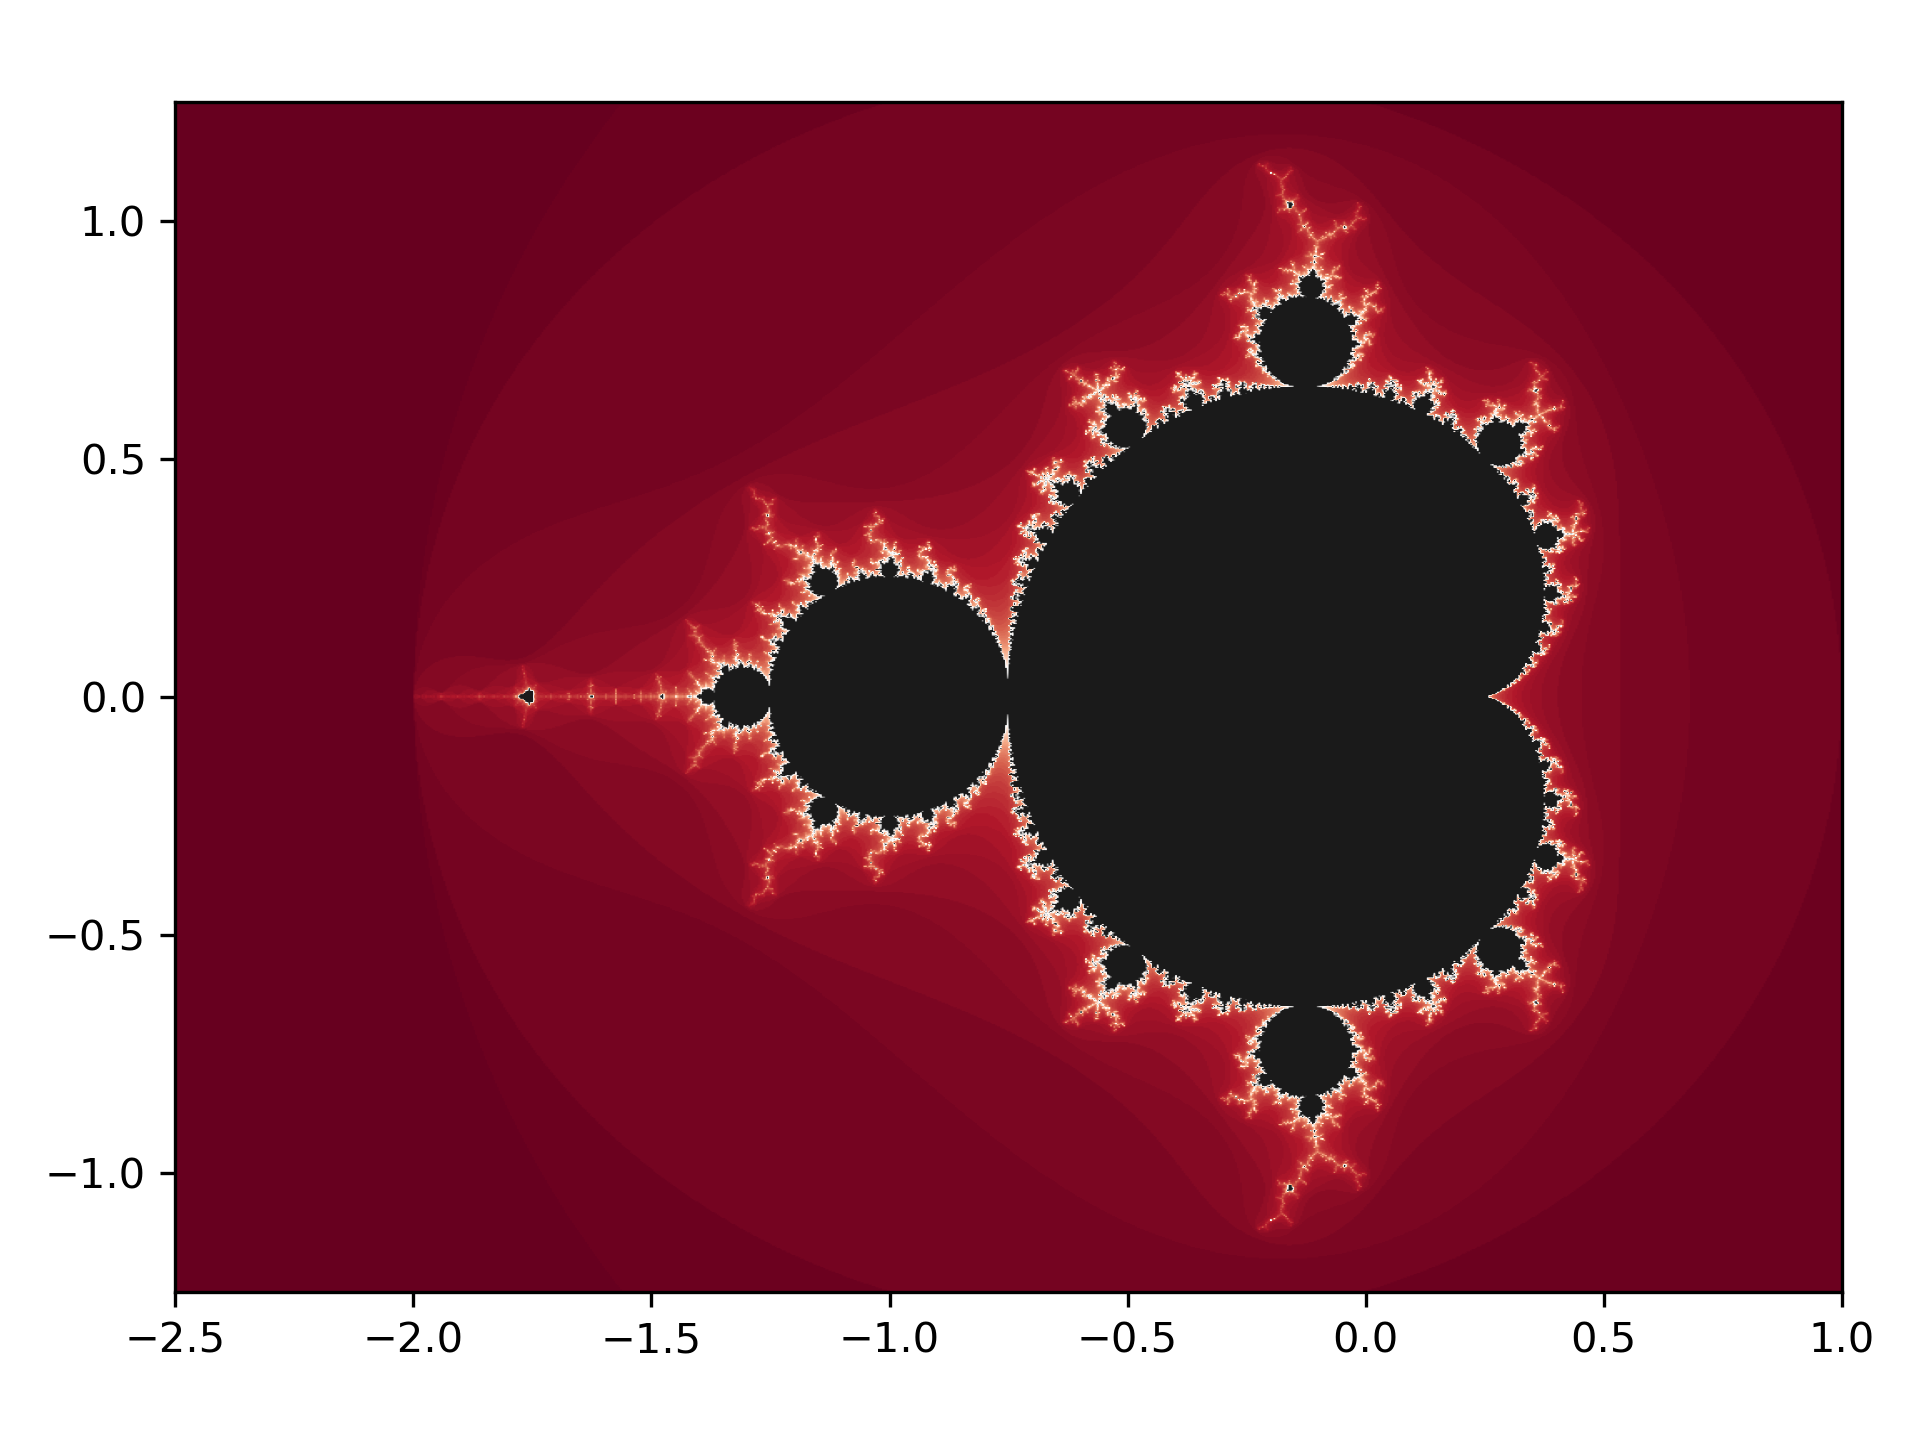

In [5]:
fig, axes = plt.subplots()
axes.imshow(iterations[::-1], extent=(x_min, x_max, y_min, y_max), cmap="RdGy")
plt.tight_layout()